In [1]:
import sys
sys.path.append("../utils/")

In [2]:
from backend_manager import BackendManager
from runner import Runner
from data_collector import DataCollector
from filter_on_kpis import FilterOnKPIs
from runner_competing import RunnerCompeting
from case_duration_manager import CaseDurationsManager
from rank_variants import RankVariants
from measurements_visualizer import MeasurementsVisualizer
from measure_and_rank import measure_and_rank

In [3]:
import os
import time
import shutil

#### 01. Backend -NA

In [4]:
submit_cmd = "sbatch submit.sh"
bm = BackendManager("login18-1.hpc.itc.rwth-aachen.de", "as641651", submit_cmd)
#bm = BackendManager("login18-1.hpc.itc.rwth-aachen.de", "as641651")
bm.connect()
#bm = None

#### 02. Runner

In [5]:
args = ["75","75","8","75","75"]

exp_dir = "../Matrix-Chain-4/variants-linnea/"
if bm:
    exp_dir = "~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea"
threads = 4
runner = Runner("MC", exp_dir, args, threads=threads, backend=bm)

#### 03. Job name - NA

In [6]:
if bm:
    args_dir_name = runner.args_dir.split('/')[-1]
    job_name = "{}_T{}".format(args_dir_name, threads)
    job_name

#### 04. DataCollector

In [7]:
if bm:
    exp_dir_local = "../Matrix-Chain-4/variants-linnea/"
    local_data_dir = os.path.join(exp_dir_local, "cluster-experiments", "{}".format(args_dir_name))
    if os.path.exists(local_data_dir):
        shutil.rmtree(local_data_dir)
    os.makedirs(local_data_dir)
    dc = DataCollector(local_data_dir, runner.args_dir, bm)
else:
    dc = DataCollector(runner.args_dir)

#### 05. Look for already available data

In [8]:
case_table = dc.get_case_table()
case_table

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/75_75_8_75_75/case_table.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/75_75_8_75_75
b''


,case:concept:name,case:flops,case:num_kernels
0,algorithm0,270000.0,3
1,algorithm2,1020000.0,3
2,algorithm4,1780000.0,3
3,algorithm1,270000.0,3
4,algorithm5,1780000.0,3
5,algorithm3,1020000.0,3


In [9]:
cm = CaseDurationsManager()
cm.collect_case_durations(dc)

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/75_75_8_75_75/mean_ranks.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/75_75_8_75_75
b''
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/75_75_8_75_75/run_times_competing_0.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/75_75_8_75_75
b''
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/75_75_8_75_75/run_times_competing_1.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/75_75_8_75_75
b''
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/75_75_8_75_75/run_times_competing_2.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/75_75_8_75_75
b''
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~

In [10]:
#cm.case_durations.head()

#### 05. Generate Experiments

In [11]:
ret = runner.generate_experiments()
ret

source ~/.analyzer; cd ~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea; python generate-variants-linnea.py 75 75 8 75 75 --threads=4;
['New solution:..............2.7e+05\n', 'No further generation steps possible.\n', '----------------------------------\n', 'Number of nodes:                 8\n', 'Solution nodes:                  1\n', 'Data:                     1.81e+04\n', 'Best solution:             2.7e+05\n', 'Intensity:                    14.9\n', 'Number of algorithms:            6\n', 'Generated Variants.\n']


0

#### 06. Single-run Experiment

In [12]:
ret = runner.run_experiments()
ret

source ~/.analyzer; cd ~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/75_75_8_75_75; sbatch submit.sh julia runner.jl;
Running experiments in the backend.


0

In [13]:
if bm:
    while bm.check_slrum_status(job_name) != 0:
        print("Waiting for Job to complete.")
        time.sleep(5)

          28432750        ih               75_75_8_75_75_T4 as641651  RUNNING       0:02   3:00:00      1 linuxihdc074

Waiting for Job to complete.
          28432750        ih               75_75_8_75_75_T4 as641651  RUNNING       0:07   3:00:00      1 linuxihdc074

Waiting for Job to complete.
['             JOBID PARTITION                           NAME     USER    STATE       TIME TIME_LIMI  NODES NODELIST(REASON)\n']


In [14]:
case_table = dc.get_case_table()
measurements = dc.get_all_runtimes_table()

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/75_75_8_75_75/run_times.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/75_75_8_75_75
b''


In [15]:
case_table

,case:concept:name,case:flops,case:num_kernels
0,algorithm0,270000.0,3
1,algorithm2,1020000.0,3
2,algorithm4,1780000.0,3
3,algorithm1,270000.0,3
4,algorithm5,1780000.0,3
5,algorithm3,1020000.0,3


In [16]:
measurements.head()

,case:concept:name,concept:name,concept:flops,concept:operation,concept:kernel,timestamp:start,timestamp:end
0,algorithm0,gemm_9e+04,90000.0,tmp3 = (C D),"gemm!('N', 'N', 1.0, ml2, ml3, 0.0, ml4)",1.656088e+09,1.656088e+09
1,algorithm0,gemm_9e+04,90000.0,tmp1 = (A B),"gemm!('N', 'N', 1.0, ml0, ml1, 0.0, ml5)",1.656088e+09,1.656088e+09
2,algorithm0,gemm_9e+04,90000.0,tmp6 = (tmp1 tmp3),"gemm!('N', 'N', 1.0, ml5, ml4, 0.0, ml6)",1.656088e+09,1.656088e+09
3,algorithm2,gemm_9e+04,90000.0,tmp1 = (A B),"gemm!('N', 'N', 1.0, ml0, ml1, 0.0, ml4)",1.656088e+09,1.656088e+09
4,algorithm2,gemm_9e+04,90000.0,tmp4 = (tmp1 C),"gemm!('N', 'N', 1.0, ml4, ml2, 0.0, ml5)",1.656088e+09,1.656088e+09


#### 07. KPI filter

In [17]:
kpi_filter = FilterOnKPIs(case_table, measurements)
kpi_filter.case_table

,case:concept:name,case:timestamp:start,case:timestamp:end,case:duration,case:flops,case:num_kernels,case:rel-flops,case:rel-duration
0,algorithm0,1.656088e+09,1.656088e+09,0.000090,270000.0,3,0.000000,1.244048
1,algorithm2,1.656088e+09,1.656088e+09,0.000055,1020000.0,3,2.777778,0.375000
2,algorithm4,1.656088e+09,1.656088e+09,0.000040,1780000.0,3,5.592593,0.000000
3,algorithm1,1.656088e+09,1.656088e+09,0.000040,270000.0,3,0.000000,0.000000
4,algorithm5,1.656088e+09,1.656088e+09,0.000079,1780000.0,3,5.592593,0.970238
5,algorithm3,1.656088e+09,1.656088e+09,0.000060,1020000.0,3,2.777778,0.494048


In [18]:
competing_cases = kpi_filter.filter_on_flops_and_rel_duration(1.2)
competing_cases

,case:concept:name,case:timestamp:start,case:timestamp:end,case:duration,case:flops,case:num_kernels,case:rel-flops,case:rel-duration
0,algorithm0,1.656088e+09,1.656088e+09,0.000090,270000.0,3,0.000000,1.244048
1,algorithm2,1.656088e+09,1.656088e+09,0.000055,1020000.0,3,2.777778,0.375000
2,algorithm4,1.656088e+09,1.656088e+09,0.000040,1780000.0,3,5.592593,0.000000
3,algorithm1,1.656088e+09,1.656088e+09,0.000040,270000.0,3,0.000000,0.000000
4,algorithm5,1.656088e+09,1.656088e+09,0.000079,1780000.0,3,5.592593,0.970238
5,algorithm3,1.656088e+09,1.656088e+09,0.000060,1020000.0,3,2.777778,0.494048


In [19]:
alg_seq_h0 = kpi_filter.get_alg_seq_sorted_on_duration(competing_cases)
alg_seq_h0

['algorithm4',
 'algorithm1',
 'algorithm2',
 'algorithm3',
 'algorithm5',
 'algorithm0']

#### 08. Runner Competing and compute ranks

In [20]:
runner_competing = RunnerCompeting(alg_seq_h0, runner.args_dir,
                                          threads=threads, backend=bm)

In [21]:
# Clear previous measurements if available before re-running
dc.delete_competing_measurements()
dc.delete_ranks()

rep_steps = 3
eps=0.001
ret = runner_competing.compute_ranks(rep_steps=rep_steps, eps=eps)
ret

removing  ../Matrix-Chain-4/variants-linnea/cluster-experiments/75_75_8_75_75/run_times_competing_4.csv
removing  ../Matrix-Chain-4/variants-linnea/cluster-experiments/75_75_8_75_75/run_times_competing_2.csv
removing  ../Matrix-Chain-4/variants-linnea/cluster-experiments/75_75_8_75_75/run_times_competing_3.csv
removing  ../Matrix-Chain-4/variants-linnea/cluster-experiments/75_75_8_75_75/run_times_competing_1.csv
removing  ../Matrix-Chain-4/variants-linnea/cluster-experiments/75_75_8_75_75/run_times_competing_0.csv
rm -rf ~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/75_75_8_75_75/*_competing_*
Error:  1
removing  ../Matrix-Chain-4/variants-linnea/cluster-experiments/75_75_8_75_75/mean_ranks.csv
rm -rf ~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/75_75_8_75_75/*ranks.csv
Error:  1
source ~/.analyzer; cd ~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/75_75_8_75_75; sbatch submit

0

In [22]:
if bm:
    while bm.check_slrum_status(job_name) != 0:
        print("Waiting for Job to complete.")
        time.sleep(5)

          28432752        ih               75_75_8_75_75_T4 as641651  RUNNING       0:13   3:00:00      1 linuxihdc074

Waiting for Job to complete.
          28432752        ih               75_75_8_75_75_T4 as641651  RUNNING       0:19   3:00:00      1 linuxihdc074

Waiting for Job to complete.
          28432752        ih               75_75_8_75_75_T4 as641651  RUNNING       0:24   3:00:00      1 linuxihdc074

Waiting for Job to complete.
          28432752        ih               75_75_8_75_75_T4 as641651  RUNNING       0:29   3:00:00      1 linuxihdc074

Waiting for Job to complete.
          28432752        ih               75_75_8_75_75_T4 as641651  RUNNING       0:35   3:00:00      1 linuxihdc074

Waiting for Job to complete.
          28432752        ih               75_75_8_75_75_T4 as641651 COMPLETI       0:39   3:00:00      1 linuxihdc074

Waiting for Job to complete.
['             JOBID PARTITION                           NAME     USER    STATE       TIME TIME_LIMI  NODE

#### 09. View Ranks

In [23]:
ranks = dc.get_ranks()
ranks

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/75_75_8_75_75/ranks.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/75_75_8_75_75
b''


,case:concept:name,case:rank:q95-q5,case:rank:q90-q10,case:rank:q85-q15,case:rank:q80-q20,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35
0,algorithm0,0,0,0,0,0,0,0
1,algorithm1,0,0,0,0,0,0,0
2,algorithm3,0,1,1,1,1,1,1
3,algorithm2,0,1,1,1,1,1,2
4,algorithm4,0,1,1,2,2,2,3
5,algorithm5,0,1,1,2,2,2,3


In [25]:
mean_ranks = dc.get_mean_ranks()
mean_ranks

,case:concept:name,case:mean-rank,case:mean-rank.1,case:mean-rank.2,case:mean-rank.3,case:mean-rank.4,case:mean-rank.5,case:mean-rank.6,case:mean-rank.7,case:mean-rank.8,case:mean-rank.9
0,algorithm4,0,2.142857,1.000000,1.428571,1.142857,1.142857,1.285714,1.428571,1.571429,1.571429
1,algorithm1,1,0.571429,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,algorithm2,2,1.571429,1.000000,1.000000,0.857143,0.714286,0.714286,1.000000,1.000000,1.000000
3,algorithm3,3,2.571429,0.857143,0.714286,0.857143,0.714286,0.714286,0.857143,0.857143,0.857143
4,algorithm5,4,3.142857,2.000000,1.857143,1.428571,1.285714,1.285714,1.428571,1.571429,1.571429
5,algorithm0,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### 10. Get Measurements

In [26]:
num_runs = mean_ranks.shape[1]-2
num_measurements = num_runs*rep_steps
print("Number of measurements per alg: ", num_measurements)

Number of measurements per alg:  27


In [27]:
cm.collect_case_durations(dc)

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/75_75_8_75_75/run_times_competing_0.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/75_75_8_75_75
b''
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/75_75_8_75_75/run_times_competing_1.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/75_75_8_75_75
b''
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/75_75_8_75_75/run_times_competing_2.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/75_75_8_75_75
b''
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/75_75_8_75_75/run_times_competing_3.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/75_75_8_75_75
b''
scp as641651@login18-1.hpc.itc.rwth-

In [28]:
alg_measurements = cm.get_alg_measurements()

#### 11. Visualize Measurements

In [33]:
#mv = MeasurementsVisualizer(alg_measurements, alg_seq_h0)
mv = MeasurementsVisualizer(alg_measurements, list(ranks['case:concept:name']))

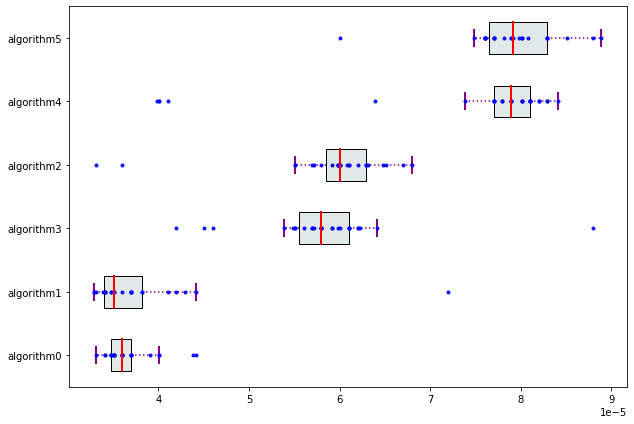

In [34]:
mv.show_measurements_boxplots(outliers=False)

In [31]:
print("Initial Sequence: ", alg_seq_h0)
ranks.merge(mean_ranks.iloc[:,[0,-1]], on='case:concept:name')

Initial Sequence:  ['algorithm4', 'algorithm1', 'algorithm2', 'algorithm3', 'algorithm5', 'algorithm0']


,case:concept:name,case:rank:q95-q5,case:rank:q90-q10,case:rank:q85-q15,case:rank:q80-q20,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35,case:mean-rank.9
0,algorithm0,0,0,0,0,0,0,0,0.000000
1,algorithm1,0,0,0,0,0,0,0,0.000000
2,algorithm3,0,1,1,1,1,1,1,0.857143
3,algorithm2,0,1,1,1,1,1,2,1.000000
4,algorithm4,0,1,1,2,2,2,3,1.571429
5,algorithm5,0,1,1,2,2,2,3,1.571429


In [32]:
competing_cases

,case:concept:name,case:timestamp:start,case:timestamp:end,case:duration,case:flops,case:num_kernels,case:rel-flops,case:rel-duration
0,algorithm0,1.656088e+09,1.656088e+09,0.000090,270000.0,3,0.000000,1.244048
1,algorithm2,1.656088e+09,1.656088e+09,0.000055,1020000.0,3,2.777778,0.375000
2,algorithm4,1.656088e+09,1.656088e+09,0.000040,1780000.0,3,5.592593,0.000000
3,algorithm1,1.656088e+09,1.656088e+09,0.000040,270000.0,3,0.000000,0.000000
4,algorithm5,1.656088e+09,1.656088e+09,0.000079,1780000.0,3,5.592593,0.970238
5,algorithm3,1.656088e+09,1.656088e+09,0.000060,1020000.0,3,2.777778,0.494048
